# Creation of a Recurrent Neural Network that will classify reviews from the imdb dataset

### Import of necessary packages

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, SpatialDropout1D, SimpleRNN, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data loading and preparation

In [2]:
# Load the data
max_words = 10000  # Limit the vocabulary to 10,000 words
maxlen = 500  # Maximum length of a review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad/truncate sequences to a fixed length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

### Implementation of a LSTM model

In [3]:
# Create the model
embedding_dim = 128
lstm_units = 64
model_LSTM = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_LSTM = model_LSTM.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on test data
scores = model_LSTM.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 881s - loss: 0.4569 - accuracy: 0.7805 - val_loss: 0.3321 - val_accuracy: 0.8617 - 881s/epoch - 4s/step
Epoch 2/5
196/196 - 756s - loss: 0.2543 - accuracy: 0.9018 - val_loss: 0.2978 - val_accuracy: 0.8780 - 756s/epoch - 4s/step
Epoch 3/5
196/196 - 690s - loss: 0.1849 - accuracy: 0.9310 - val_loss: 0.3170 - val_accuracy: 0.8741 - 690s/epoch - 4s/step
Epoch 4/5
196/196 - 683s - loss: 0.1543 - accuracy: 0.9451 - val_loss: 0.3296 - val_accuracy: 0.8680 - 683s/epoch - 3s/step
Epoch 5/5
196/196 - 696s - loss: 0.1431 - accuracy: 0.9480 - val_loss: 0.3767 - val_accuracy: 0.8690 - 696s/epoch - 4s/step
Accuracy: 86.90%


In [4]:
# Visualization of the training schedule
def plot_training_histories(histories, names):
    plt.figure(figsize=(12, 6))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=name + ' Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=name + ' Training Loss')
        plt.plot(history.history['val_loss'], label=name + ' Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()
    

def plot_training_histories_compare(histories, names):
    plt.figure(figsize=(12, 6))

    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

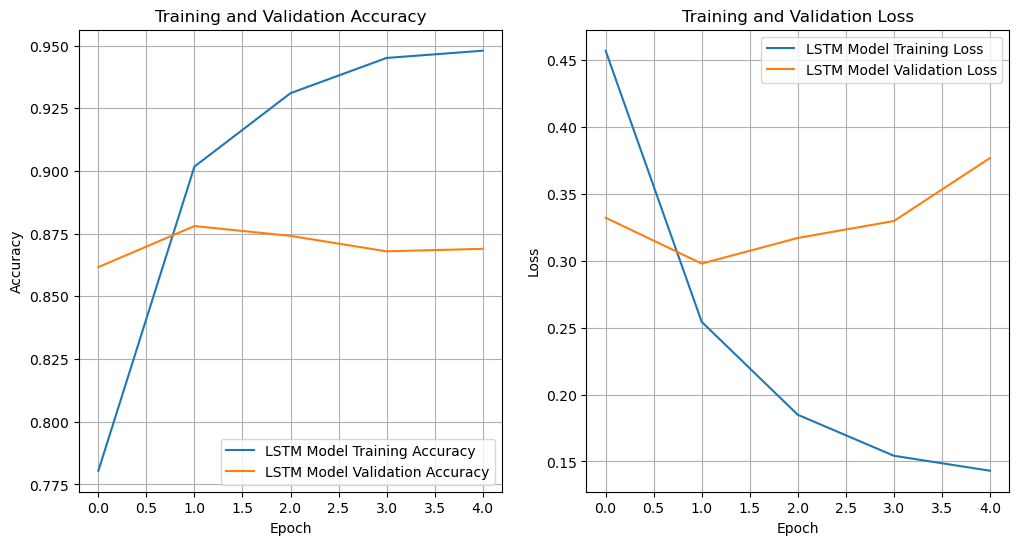

In [5]:
# Call the function to plot the graph
plot_training_histories([history_LSTM], ['LSTM Model'])

### Implementation of a RNN model

In [8]:
# Create the model
model_RNN = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    SimpleRNN(64),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_RNN = model_RNN.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on test data
scores = model_RNN.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 124s - loss: 0.5297 - accuracy: 0.7260 - val_loss: 0.4003 - val_accuracy: 0.8304 - 124s/epoch - 632ms/step
Epoch 2/5
196/196 - 139s - loss: 0.3200 - accuracy: 0.8669 - val_loss: 0.3694 - val_accuracy: 0.8437 - 139s/epoch - 711ms/step
Epoch 3/5
196/196 - 144s - loss: 0.2382 - accuracy: 0.9049 - val_loss: 0.4469 - val_accuracy: 0.8288 - 144s/epoch - 736ms/step
Epoch 4/5
196/196 - 145s - loss: 0.1457 - accuracy: 0.9462 - val_loss: 0.4472 - val_accuracy: 0.8429 - 145s/epoch - 741ms/step
Epoch 5/5
196/196 - 143s - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.5232 - val_accuracy: 0.8475 - 143s/epoch - 730ms/step
Accuracy: 84.75%


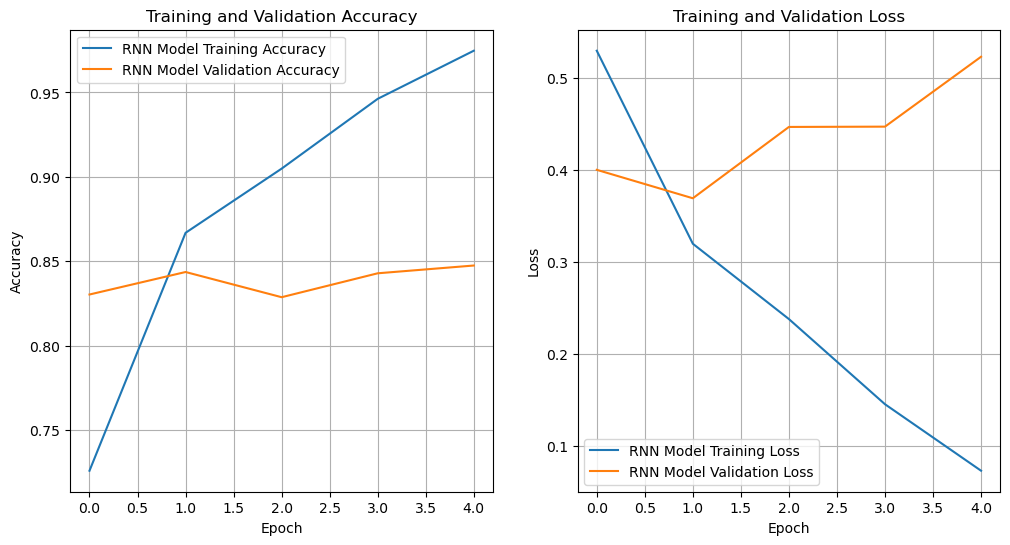

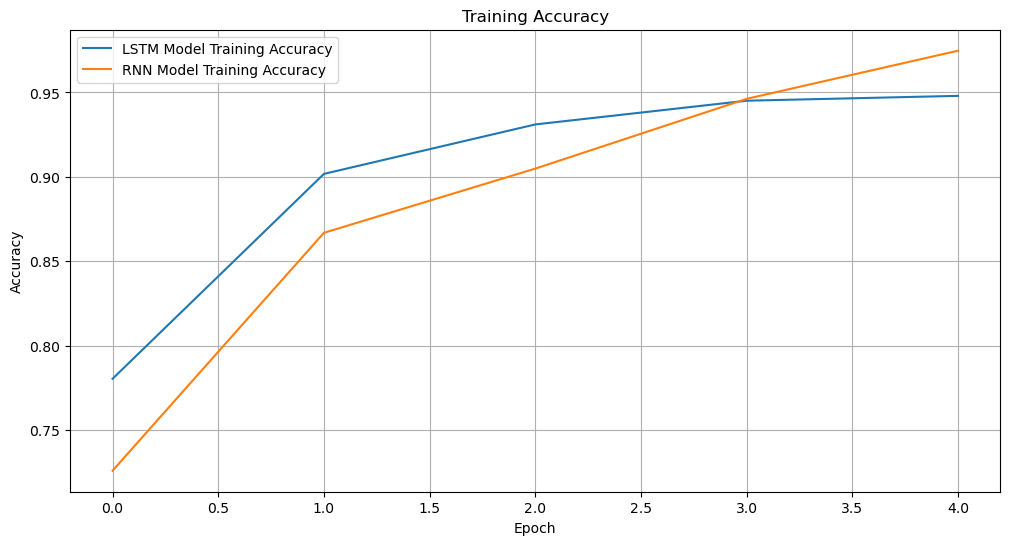

In [10]:
# Visualization of the training schedule
plot_training_histories([history_RNN], ['RNN Model'])

# Training graphs for models
plot_training_histories_compare([history_LSTM, history_RNN], ['LSTM Model', 'RNN Model'])

### Implementation of a Bidirectional RNN model

In [11]:
# Create the model
model_BRNN = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(SimpleRNN(64)),  # Bidirectional
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_BRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_BRNN = model_BRNN.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on test data
scores = model_BRNN.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 267s - loss: 0.6029 - accuracy: 0.6552 - val_loss: 0.4788 - val_accuracy: 0.7888 - 267s/epoch - 1s/step
Epoch 2/5
196/196 - 280s - loss: 0.3759 - accuracy: 0.8412 - val_loss: 0.5464 - val_accuracy: 0.7155 - 280s/epoch - 1s/step
Epoch 3/5
196/196 - 279s - loss: 0.2333 - accuracy: 0.9104 - val_loss: 0.4410 - val_accuracy: 0.8204 - 279s/epoch - 1s/step
Epoch 4/5
196/196 - 276s - loss: 0.1013 - accuracy: 0.9666 - val_loss: 0.5557 - val_accuracy: 0.7785 - 276s/epoch - 1s/step
Epoch 5/5
196/196 - 281s - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.5982 - val_accuracy: 0.8188 - 281s/epoch - 1s/step
Accuracy: 81.88%


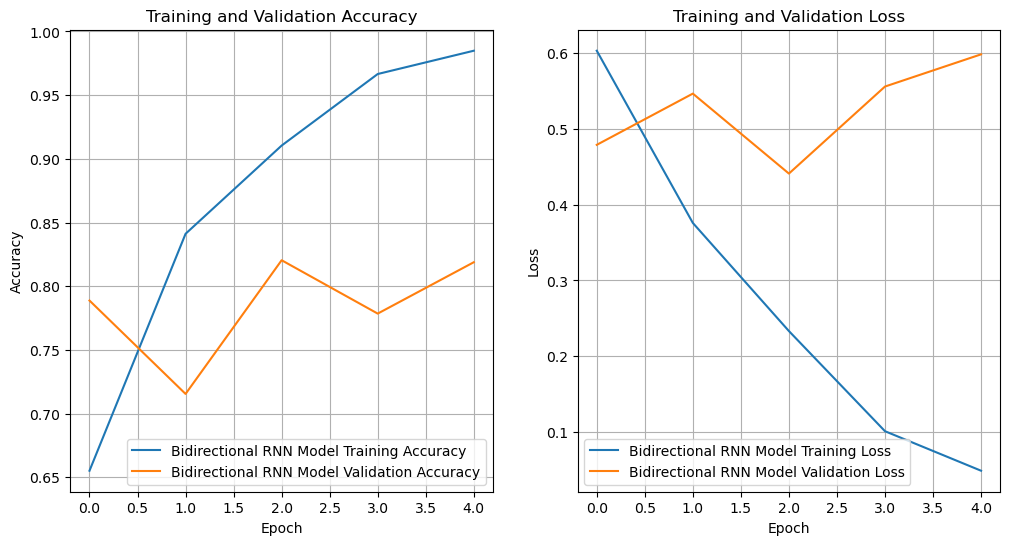

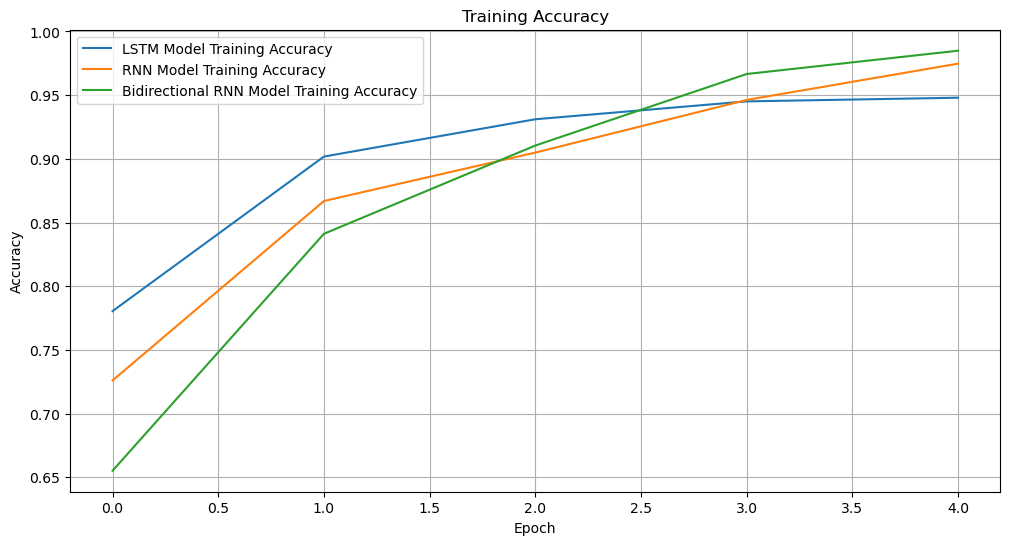

In [12]:
# Visualization of the training schedule
plot_training_histories([history_BRNN], ['Bidirectional RNN Model'])

# Training graphs for models
plot_training_histories_compare([history_LSTM, history_RNN, history_BRNN], ['LSTM Model', 'RNN Model', 'Bidirectional RNN Model'])

### Implementation of a Deep RNN model

In [14]:
# Create the model
model_DRNN = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),  # Dropout layer for regularization
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSMT
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSMT
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_DRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_DRNN = model_DRNN.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on test data
scores = model_DRNN.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 105s - loss: 0.3999 - accuracy: 0.8090 - val_loss: 0.3481 - val_accuracy: 0.8548 - 105s/epoch - 534ms/step
Epoch 2/5
196/196 - 99s - loss: 0.2141 - accuracy: 0.9188 - val_loss: 0.3032 - val_accuracy: 0.8778 - 99s/epoch - 507ms/step
Epoch 3/5
196/196 - 105s - loss: 0.1598 - accuracy: 0.9418 - val_loss: 0.3616 - val_accuracy: 0.8703 - 105s/epoch - 536ms/step
Epoch 4/5
196/196 - 111s - loss: 0.1210 - accuracy: 0.9576 - val_loss: 0.4217 - val_accuracy: 0.8608 - 111s/epoch - 567ms/step
Epoch 5/5
196/196 - 109s - loss: 0.0909 - accuracy: 0.9699 - val_loss: 0.4283 - val_accuracy: 0.8664 - 109s/epoch - 556ms/step
Accuracy: 86.64%


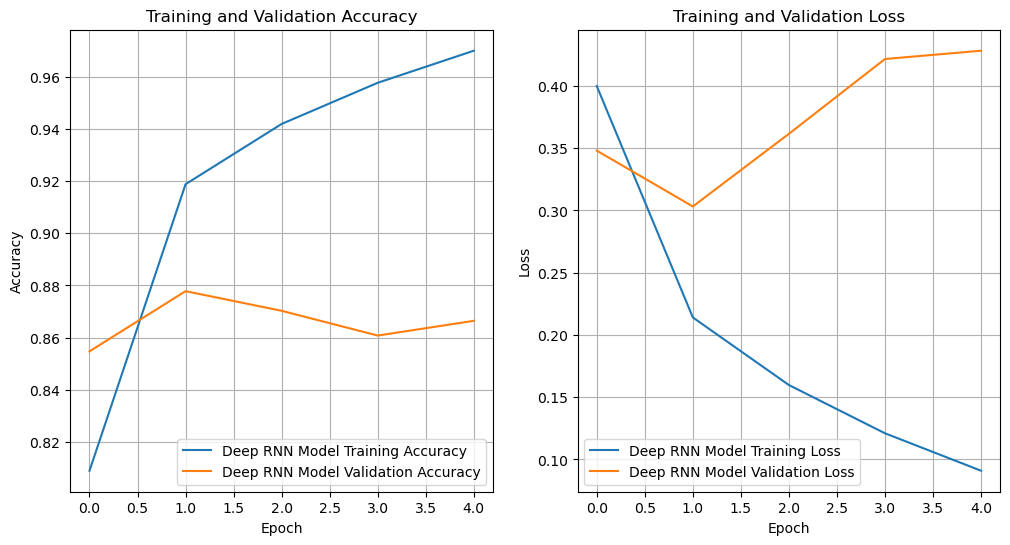

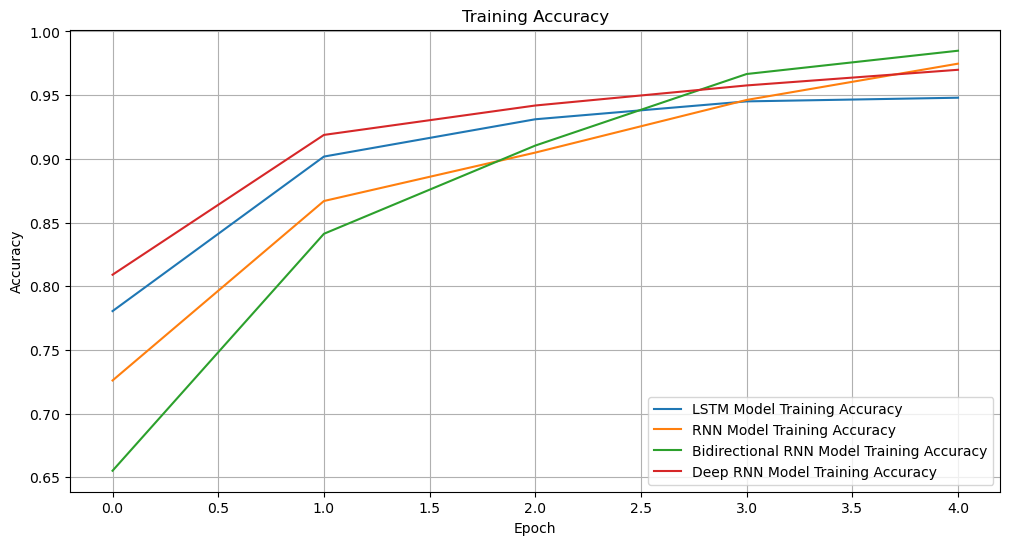

In [15]:
# Visualization of the training schedule
plot_training_histories([history_DRNN], ['Deep RNN Model'])

# Training graphs for models
plot_training_histories_compare([history_LSTM, history_RNN, history_BRNN, history_DRNN], ['LSTM Model', 'RNN Model', 'Bidirectional RNN Model', 'Deep RNN Model'])

### Сonclusion:

##### As we can see, we get the best test accuracy result of 86.90% with an LSTM Recurrent Neural Network (model_LSTM), that has the next hyperparameters: sigmoid activation, ADAM optimizer, 5 epochs, 20% Dropout, and batch size 128. Although it has worse training accuracy than other models

### Prediction using a trained LSTM model

In [17]:
predictions = model_LSTM.predict(x_test)

# To get a clearer view of the forecasts, they can be converted into a binary format:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Some predicted values can be displayed alongside the actual values for comparison
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}")

782/782 [==============================] - 180s 229ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
